#### Karger's Algorithm w/ Adjacency List 

```
def karger(G):
    n <- |V|
    while n >2:
        select a random edge (u,v)
        perform contraction of (u,v)
        n <- n-1
```

Given a graph $G$, contraction of edge $(u,v)$ merges vertices $u$ and $v$ into a single super-vertex $\{u,v\}$ and removes any self-loops.

To implement the contraction operation such that it runs in $O(n)$ time, where $n$ is the number of vertices is the graph, we will maintain two data structures:

1) An array containing all the vertices, each $u$ vertex internally maintains a linked list of tuples, each tuple contains a pointers to an adjacent vertex $v$ and a pointer to the corresponding edge $(u,v)$. So, this data structure is basically an `adjacency list` representration of the graph.

2) A dynamic array containing all edges in the graph, called the `edge list`. Each edge $(u,v)$ internally contains pointers to the vertices $u$ and $v$ and also the array index position where it is located. Edges from this array can be accessed/modified and removed in $O(1)$ time (to remove an edge, we simply swap it with the last element of the array and decrease the array size by 1).

Given a randomly selected edge $(u,v)$ removed from the edge list, we perform a contraction of this edge as follows. First, we merge vertices $u$ and $v$. We do this by taking the adjacency list of $v$ and appending it to the adjacency list of $u$. Thus $u$ represents the new merged super-vertex. We make sure to remove all self-loops by deleting all the parallel edges between $(u,v)$. We also want to find all vertices $w$ that were previously adjacent to $v$ and replace $v$ inside adjacency list of $w$ with the super-vertex $u$, and at the same time, we also update the edges $(v,w)$ to $(u,w)$ 


```
def contraction(edge):
    (u,v) <- edge
    
    for each w in u.adjacency list:
        if w == v:
            remove the edge (u,w) from edge list  # self-loop removal
    
    for each w in v.adjacency_list:
        if w != u:
            append w to u.adjacency_list 
            replace v in w.adjacency_list with u
            update edge (v,w) to (u,w) inside edge list 
        else if w == u:
            remove the edge (u,w) from edge list  # self-loop removal  


```



In [13]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(E, fig_size=5):
    # Create a new graph
    G = nx.Graph()

    # Add edges to the graph
    for (u, v) in E:
        G.add_edge(u, v)

    # Draw the graph
    plt.figure(figsize=(fig_size, fig_size))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()

In [10]:
class Vertex:
    def __init__(self, id):
        self.id = id
        self.adjacency_list = []

    def __str__(self):
        return str(self.id)

    def __repr__(self):
        return str(self.id)


class Edge:
    def __init__(self, u, v, array_pos=None):
        self.u = u
        self.v = v
        self.array_pos = array_pos

    def __str__(self):
        return str((self.u, self.v))

    def __repr__(self):
        return str((self.u, self.v))



def karger(G):
    (V, E) = G  # V is a list of vertex ids (0,1,2,...,n-1) and E is a list of edges [(u,v), ...]

    # create array of vertices
    vertices = []
    for v in V:
        vertices.append(Vertex(v))

    # create edge list and adjacency list inside each vertex
    edge_list = []
    for (u,v) in E:
        edge = Edge(u, v, array_pos=len(edge_list))
        edge_list.append(edge)
        vertices[u].adjacency_list.append((v,edge))
        vertices[v].adjacency_list.append((u,edge))    


    print("Adjacency lists:")
    for v in vertices:
        print(f"{v.id}: {[(x[0], x[1]) for x in v.adjacency_list]}")

    print("\nEdge list: ")
    for e in edge_list:
        print(f"Position: {e.array_pos} --> ({e.u}, {e.v})")

Adjacency lists:
0: [(1, (0, 1)), (2, (0, 2))]
1: [(0, (0, 1)), (2, (1, 2))]
2: [(0, (0, 2)), (1, (1, 2)), (3, (2, 3))]
3: [(2, (2, 3)), (4, (3, 4)), (5, (3, 5))]
4: [(3, (3, 4)), (5, (4, 5))]
5: [(3, (3, 5)), (4, (4, 5))]

Edge list: 
Position: 0 --> (0, 1)
Position: 1 --> (0, 2)
Position: 2 --> (1, 2)
Position: 3 --> (2, 3)
Position: 4 --> (3, 4)
Position: 5 --> (3, 5)
Position: 6 --> (4, 5)


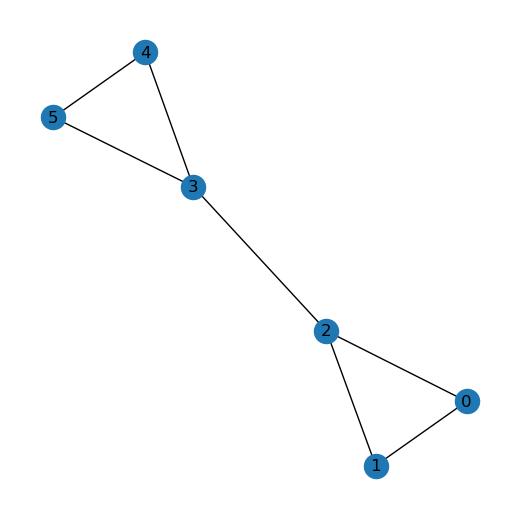

In [14]:
# example graph
V = [0,1,2,3,4,5]
E = [(0,1), (0,2), (1,2), (2,3), (3,4), (3,5), (4,5)]
G = (V,E)

# test karger
karger(G)

# plot the graph
plot_graph(E, fig_size=5)

